# Ejercicio 4

$SCR Basico = \sqrt{\sum_{i,j} Corr_{i,j} \cdot SCR_{i} \cdot SCR_{j}}$

Dados los siguientes valores de los diferentes submódulos de SCR:

| Mercado | Crédito | Vida | Salud | No Vida |
| --- | --- | --- | --- | --- |
| 95.000 | 65.000 | 25.000 | 35.000 | 125.000 |

Se pide:
* Calcular el BSCR aplicando la matriz de correlaciones del Reglamento Delegado de Solvencia II:


|  a | b  | c  | d  |  e |
| --- | --- | --- | --- | --- |
| 1 | 0.25 | 0.25 | 0.25 | 0.25 |
| 0.25 | 1 | 0.25 | 0.25 | 0.5 |
| 0.25 | 0.25 | 1 | 0.25 | 0 |
| 0.25 | 0.25 | 0.25 | 1 | 0 |
| 0.25 | 0.5 | 0 | 0 | 1 |

In [4]:
import numpy as np

SubSCR = np.array([95000,65000,25000,35000,125000])

MatCorBSCR = np.array([[1, 0.25, 0.25, 0.25, 0.25],
                        [0.25, 1, 0.25, 0.25, 0.5],
                        [0.25, 0.25, 1, 0.25, 0],
                        [0.25, 0.25, 0.25, 1, 0],
                        [0.25, 0.5, 0, 0, 1]])
                        
BasicSCR = np.sqrt(SubSCR @ MatCorBSCR @ SubSCR.T)
BasicSCR

230461.49352983027

*  Calcular el efecto de diversificación:

In [14]:
efecto_divers = BasicSCR - sum(SubSCR)
efecto_divers

-114538.50647016973

* Hacer gráfica

In [35]:
import matplotlib.pyplot as plt

datos = np.append(SubSCR, efecto_divers)
sum(datos)

230461.49352983027

<BarContainer object of 6 artists>

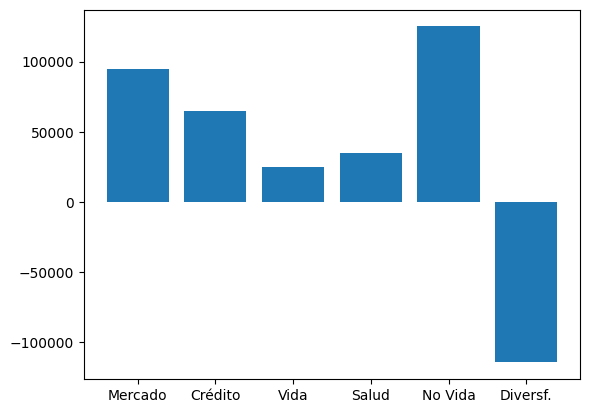

In [37]:
plt.bar(range(len(datos)), datos, tick_label=['Mercado','Crédito','Vida','Salud','No Vida','Diversf.'])

* Hacer gráfica acumulada (como suelen incluir las entidades en sus informes de Solvencia):

<BarContainer object of 6 artists>

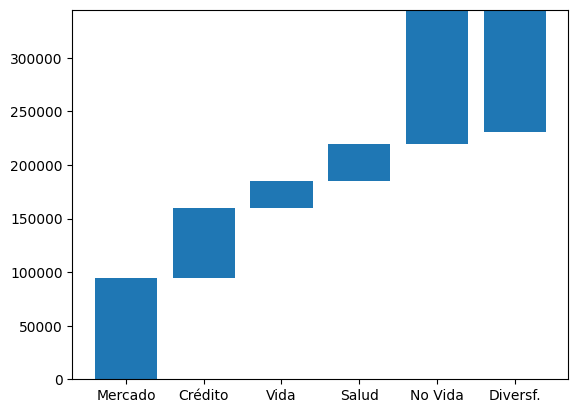

In [53]:
acumulado = np.cumsum(datos)
inicios = np.append(0, acumulado[:-1]) # Añado cero al inicio y elimino el último
plt.bar(range(len(acumulado)), datos, bottom=inicios, tick_label=['Mercado','Crédito','Vida','Salud','No Vida','Diversf.'])